In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
import numpy as np
import os 
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import random
from tqdm import tqdm 

[[167 160 168 ... 146 183 203]
 [162 168 160 ... 204 213 156]
 [164 162 138 ... 170 120 135]
 ...
 [131 144  90 ... 134 126 129]
 [138  62  73 ... 138 102 100]
 [ 81 105 100 ... 131 112 136]]


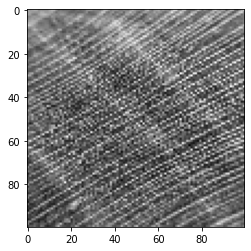

In [ ]:
datadir = "/content/drive/MyDrive/15 loại gỗ"
categories=['Anh_dao','Beech','Bo_de','Cao_su','Cate','Dang_huong_viet','Gu_huong','Keo_lai','Lim','Mun','Soi','Trai_li','Xa_cu','Xoay','mun_soc']
img_size=100
for category in categories:
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
    new_array = cv.resize(img_array,(img_size,img_size))
    print(new_array)
    plt.imshow(new_array,cmap='gray')
    plt.show()
    break
  break

In [ ]:
training_data=[]
def create_traning_data():

  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category)

    for img in tqdm(os.listdir(path)):
      try:
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        new_array = cv.resize(img_array,(img_size,img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
create_traning_data()
print(len(training_data))

100%|██████████| 500/500 [00:27<00:00, 18.19it/s]

6971


In [ ]:
#saving (x:picture), (y:label)
X=[]
y=[]
for features, label in training_data :
  X.append(features)
  y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,1)
y=np.array(y)
print('X',X.shape)
print('y',y.shape)

X (6971, 100, 100, 1)
y (6971,)


In [ ]:
#saving x, y as file.pickle into drive
pickle_out=open("/content/drive/MyDrive/15 loại gỗ/save/X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out=open("/content/drive/MyDrive/15 loại gỗ/save/y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [ ]:
#BUILD MODEL
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
pickle_in = open("/content/drive/MyDrive/15 loại gỗ/save/X.pickle","rb")
X= pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/15 loại gỗ/save/y.pickle","rb")
y= pickle.load(pickle_in)

X=X/255.0
print('X',X.shape)
print('y',y.shape)

X (6971, 100, 100, 1)
y (6971,)


In [ ]:
y= to_categorical(y,15)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(100,100,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(Conv2D(256,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(15,activation='softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD,Adam
opt =Adam()
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X,y,epochs=200,batch_size=64,validation_split=0.3,verbose=1)

Epoch 1/200
77/77 [==============================] - 19s 85ms/step - loss: 2.1541 - accuracy: 0.2382 - val_loss: 12.6007 - val_accuracy: 0.0296
Epoch 2/200
77/77 [==============================] - 5s 70ms/step - loss: 1.5685 - accuracy: 0.4257 - val_loss: 14.2464 - val_accuracy: 0.0292
Epoch 3/200
77/77 [==============================] - 6s 72ms/step - loss: 1.2831 - accuracy: 0.5255 - val_loss: 17.2221 - val_accuracy: 0.0526
Epoch 4/200
77/77 [==============================] - 5s 71ms/step - loss: 0.8501 - accuracy: 0.6944 - val_loss: 15.7342 - val_accuracy: 0.0894
Epoch 5/200
77/77 [==============================] - 5s 71ms/step - loss: 0.5956 - accuracy: 0.7850 - val_loss: 23.4903 - val_accuracy: 0.0574
Epoch 6/200
77/77 [==============================] - 5s 71ms/step - loss: 0.3655 - accuracy: 0.8774 - val_loss: 25.1176 - val_accuracy: 0.0908
Epoch 7/200
77/77 [==============================] - 5s 71ms/step - loss: 0.3356 - accuracy: 0.8852 - val_loss: 26.2866 - val_accuracy: 0.076

In [ ]:
model.save('15loaigo.h5')

In [ ]:
model = load_model('/content/drive/MyDrive/15 loại gỗ/15loaigo.h5')

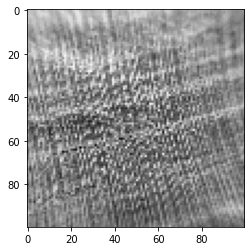

In [ ]:
img_test='/content/drive/MyDrive/15 loại gỗ/test/anhdao (217).jpg'
categories=['Anh_dao','Beech','Bo_de','Cao_su','Cate','Dang_huong_viet','Gu_huong','Keo_lai','Lim','Mun','Soi','Trai_li','Xa_cu','Xoay','mun_soc']
def prepare (filepath):
  img_size=100
  img_array=cv.imread(filepath, cv.IMREAD_GRAYSCALE)
  new_array=cv.resize(img_array,(100,100))
  new_array=new_array/255.0
  return new_array.reshape(-1,100,100,1)
plt.imshow(np.squeeze(prepare(img_test)),cmap='gray')
plt.show()

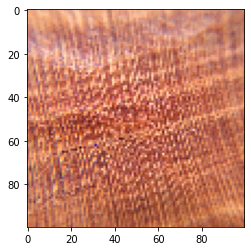

Prediction value Anh_dao


In [ ]:
from keras.preprocessing.image import load_img,img_to_array
img1=load_img(img_test,target_size=(100,100))
img1_tensor=img_to_array(img1)
img1_tensor=np.expand_dims(img1_tensor,axis=0)
img1_tensor /= 255
plt.imshow(np.squeeze(img1_tensor))
plt.show()
prediction=model.predict([prepare(img_test)])
print('Prediction value',categories[int(np.argmax(prediction))])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Cao_su


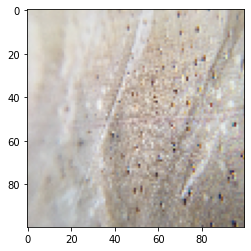

In [ ]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'Anh_dao',
          1: 'Beech', 
          2: 'Bo_de',   
          3: 'Cao_su',
          4: 'Cate',
          5: 'Dang_huong_viet',
          6: 'Gu_huong',
          7: 'Keo_lai',
          8: 'Lim',
          9: 'Mun',
          10: 'Soi',
          11: 'Trai_li',
          12: 'Xa_cu',
          13: 'Xoay',
          14: 'mun_soc',
          }
	# load model
img = load_image('/content/drive/MyDrive/15 loại gỗ/test/ caosu (226).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Dang_huong_viet


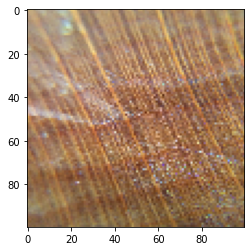

In [ ]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'Anh_dao',
          1: 'Beech', 
          2: 'Bo_de',   
          3: 'Cao_su',
          4: 'Cate',
          5: 'Dang_huong_viet',
          6: 'Gu_huong',
          7: 'Keo_lai',
          8: 'Lim',
          9: 'Mun',
          10: 'Soi',
          11: 'Trai_li',
          12: 'Xa_cu',
          13: 'Xoay',
          14: 'mun_soc',
          }
	# load model
img = load_image('/content/drive/MyDrive/15 loại gỗ/test/beech (262).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
expectation Cate


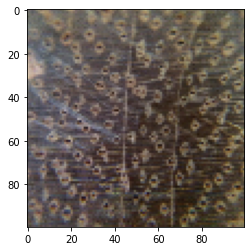

In [ ]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'Anh_dao',
          1: 'Beech', 
          2: 'Bo_de',   
          3: 'Cao_su',
          4: 'Cate',
          5: 'Dang_huong_viet',
          6: 'Gu_huong',
          7: 'Keo_lai',
          8: 'Lim',
          9: 'Mun',
          10: 'Soi',
          11: 'Trai_li',
          12: 'Xa_cu',
          13: 'Xoay',
          14: 'mun_soc',
          }
	# load model
img = load_image('/content/drive/MyDrive/15 loại gỗ/test/cate (213).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
expectation Soi


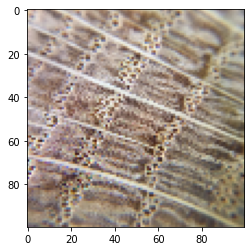

In [ ]:
from keras.models import load_model
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(100, 100))	
	
	return img
labels = {0: 'Anh_dao',
          1: 'Beech', 
          2: 'Bo_de',   
          3: 'Cao_su',
          4: 'Cate',
          5: 'Dang_huong_viet',
          6: 'Gu_huong',
          7: 'Keo_lai',
          8: 'Lim',
          9: 'Mun',
          10: 'Soi',
          11: 'Trai_li',
          12: 'Xa_cu',
          13: 'Xoay',
          14: 'mun_soc',
          }
	# load model
img = load_image('/content/drive/MyDrive/15 loại gỗ/test/soi (384).jpg')
plt.imshow(img)
img = img_to_array(img)
img.shape
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
img = img.reshape(1,100,100,1)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('expectation',labels[np.argmax(result)]) 

In [ ]:
from IPython.display import display, Javascript, Image
# JavaScript to properly create our live video stream using our webcam as input

def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="color: red; font-weight: bold;">' +
          'Bấm vào video để dừng</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }
            
      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
%cd /content
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
import numpy as np
import PIL
import io
import cv2
from keras.models import  load_model
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

# start streaming video from webcam
video_stream()
# label for video
label_html = 'Đang lấy hình ảnh...'
# initialze bounding box to empty
bbox = ''
count = 0 

# Load model Nhận diện gỗ
model_file_path = "/content/drive/MyDrive/15 loại gỗ/15loaigo.h5"
cnnmodel = load_model(model_file_path)

classes = ['Anh_dao','Beech','Bo_de','Cao_su','Cate','Dang_huong_viet','Gu_huong','Keo_lai','Lim','Mun','Soi','Trai_li','Xa_cu','Xoay','mun_soc']
img_size=100

while True:
    # Đọc ảnh trả về từ JS
    js_reply = video_frame(label_html, bbox)
    if not js_reply:
        break

    # convert JS response to OpenCV Image
    frame = js_to_image(js_reply["img"])

    # Resize để đưa vào model
    frame_p = cv2.resize(frame, dsize=(100,100))
    frame_p.shape
    frame_p= cv2.cvtColor(frame_p,cv2.COLOR_BGR2GRAY)
    frame_p = frame_p.reshape(100,100,1)  
    tensor = np.expand_dims(frame_p, axis=0)

    # Feed vào mạng
    pred = cnnmodel.predict(tensor)
    class_id = np.argmax(pred)
    class_name = classes[class_id]

    # Vẽ lên một ảnh để tẹo nữa overlay

    # create transparent overlay for bounding box
    bbox_array = np.zeros([480,640,4], dtype=np.uint8)
   
    bbox_array = cv2.putText(bbox_array, "{}".format(class_name),
                        (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5,
                        (0, 255,0), 2)

    bbox_array[:,:,3] = (bbox_array.max(axis = 2) > 0 ).astype(int) * 255
    # convert overlay of bbox into bytes
    bbox_bytes = bbox_to_bytes(bbox_array)
    # update bbox so next frame gets new overlay
    bbox = bbox_bytes


/content


<IPython.core.display.Javascript object>